# CA4 - Liver Disease Prediction
### Jony Karmakar

### Imports

In [579]:
# Importing Libaries
# ======================
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict

### Reading data

In [355]:
# Loading the dataset 
# ======================
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv', index_col=0)

### Data exploration and visualisation

In [356]:
#Cheking for missing data
# =======================
null_counts = df_train.isnull().sum().sum()
print(f'Total Missing values: {null_counts}' )

Total Missing values: 0


In [357]:
# Checking the info of the dataset
# ================================
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 702
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       703 non-null    int64  
 1   AFP (ng/mL)                 703 non-null    float64
 2   ALP (U/L)                   703 non-null    float64
 3   ALT (U/L)                   703 non-null    float64
 4   AST (U/L)                   703 non-null    float64
 5   Age                         703 non-null    int64  
 6   Albumin (g/dL)              703 non-null    float64
 7   Alcohol_Use (yes/no)        703 non-null    object 
 8   Bilirubin (mg/dL)           703 non-null    float64
 9   CRP (mg/L)                  703 non-null    float64
 10  Diabetes (yes/no)           703 non-null    object 
 11  Fibroscan (kPa)             703 non-null    float64
 12  GGT (U/L)                   703 non-null    float64
 13  Gender                      703 non-null

In [358]:
# Printing the first 10 rows of the dataframe with head(10)
# =========================================================
df_train.head(10)

,index,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Alcohol_Use (yes/no),Bilirubin (mg/dL),CRP (mg/L),...,Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH,Diagnosis
0,1124,13.571425,1653.138489,40.405592,45.598427,4,4.477126,yes,0.541997,1.002121,...,2.569954,97.242495,2.923385,26.696110,96.124260,315.439318,30.827639,4.180007,6.163600,Healthy
1,1188,13.649342,1940.518305,21.336986,34.064095,55,3.190724,yes,1.199063,0.582746,...,3.024642,128.597676,2.719966,23.021218,50.554650,268.492437,47.896200,4.590995,5.244266,Cirrhosis
2,530,10.898943,1557.369920,29.665496,16.044488,30,4.506351,no,0.740952,1.670375,...,2.219844,98.026938,3.267757,20.123808,82.900681,312.107620,31.408057,4.524580,5.769592,Healthy
3,686,13.872275,1273.840525,142.418649,64.204257,0,3.665655,yes,1.939879,1.220646,...,1.704282,63.105133,1.937625,36.436855,72.360010,182.506010,34.577016,4.234483,5.982228,Drug-induced Liver Injury
4,296,10.102457,1461.622515,22.437303,23.940205,59,4.005109,no,0.769535,0.139863,...,2.656926,89.966713,1.979801,20.036074,63.216136,212.261519,42.384844,4.306892,4.837404,Healthy
5,663,5.824125,1921.018155,83.136847,39.372095,64,3.471696,no,0.557283,8.021424,...,2.770285,96.542657,4.784693,27.760083,80.140859,304.210829,31.735444,4.275489,5.187919,Fatty Liver Disease
6,40,12.476249,2182.137388,97.396622,98.221842,29,4.112928,no,1.670063,1.209236,...,2.801148,152.299112,1.687116,7.641927,70.282273,341.402911,44.609787,8.069525,7.183443,Hepatitis
7,889,11.157910,1804.807405,25.813858,59.671478,34,3.739201,yes,0.549854,0.980465,...,1.855184,72.934571,2.610542,16.227916,85.302620,201.170284,36.255141,4.693278,7.304284,Fatty Liver Disease
8,785,9.174636,1229.834674,27.789897,37.531030,3,4.359691,yes,0.749890,3.311809,...,3.953037,125.110690,2.343232,18.905484,81.647554,296.340915,42.218500,4.526654,6.785159,Healthy
9,1171,10.889718,1314.998314,33.851749,22.029857,50,3.581977,yes,0.833413,1.065233,...,2.329074,40.899839,1.986068,20.626322,62.711051,339.683427,12.040575,4.393664,5.718308,Healthy


In [393]:
# Dropping the first column
# ==========================
df_train = df_train.drop('index', axis=1)


In [394]:
# Shwowing descriptive statistics of the dataset
# ==============================================
df_train.describe()

,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Bilirubin (mg/dL),CRP (mg/L),Fibroscan (kPa),GGT (U/L),...,Serum_Copper (μg/dL),Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,...,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,23.804227,1624.337402,58.262199,46.855946,27.206259,4.155568,1.056841,2.021190,8.899789,347.457426,...,105.754889,2.901900,105.901892,2.867523,21.440875,78.021500,288.708468,38.220427,5.000254,6.072044
std,54.938736,517.367426,36.372428,30.838523,23.632185,0.432317,0.617223,2.638333,3.822241,371.157528,...,26.159403,0.647559,33.699054,0.936050,6.946169,15.826557,54.223207,15.438507,2.025527,0.642783
min,-22.836893,546.609117,-14.313734,-16.215535,0.000000,2.625845,0.130291,0.075035,2.323530,17.056568,...,30.099096,1.525736,8.328732,0.711997,7.641927,34.170231,102.896996,2.496813,4.129884,4.416868
25%,8.029213,1229.735749,29.939330,24.163363,5.000000,3.880943,0.634089,0.651623,6.273365,131.695741,...,88.632128,2.441051,84.737590,2.211484,16.422281,66.617374,248.832647,28.598082,4.243197,5.724293
50%,10.195074,1553.771408,48.857238,38.720602,23.000000,4.166995,0.801903,1.238123,7.966800,244.400101,...,102.842960,2.844621,104.670558,2.700933,20.668951,78.024893,290.278094,35.617342,4.331605,6.085019
75%,12.656547,1931.433883,84.583900,70.023374,45.000000,4.437957,1.396853,2.449216,10.588808,419.660403,...,118.722674,3.275906,125.937089,3.393898,25.096926,88.452369,326.508987,46.630605,4.762898,6.485114
max,449.925304,3769.332343,178.226798,154.173314,86.000000,5.447072,3.712815,32.356076,26.691648,3426.981860,...,227.617474,5.729147,223.915730,8.010270,51.875943,120.279580,484.581225,156.858874,21.195702,8.368522


### Histogram

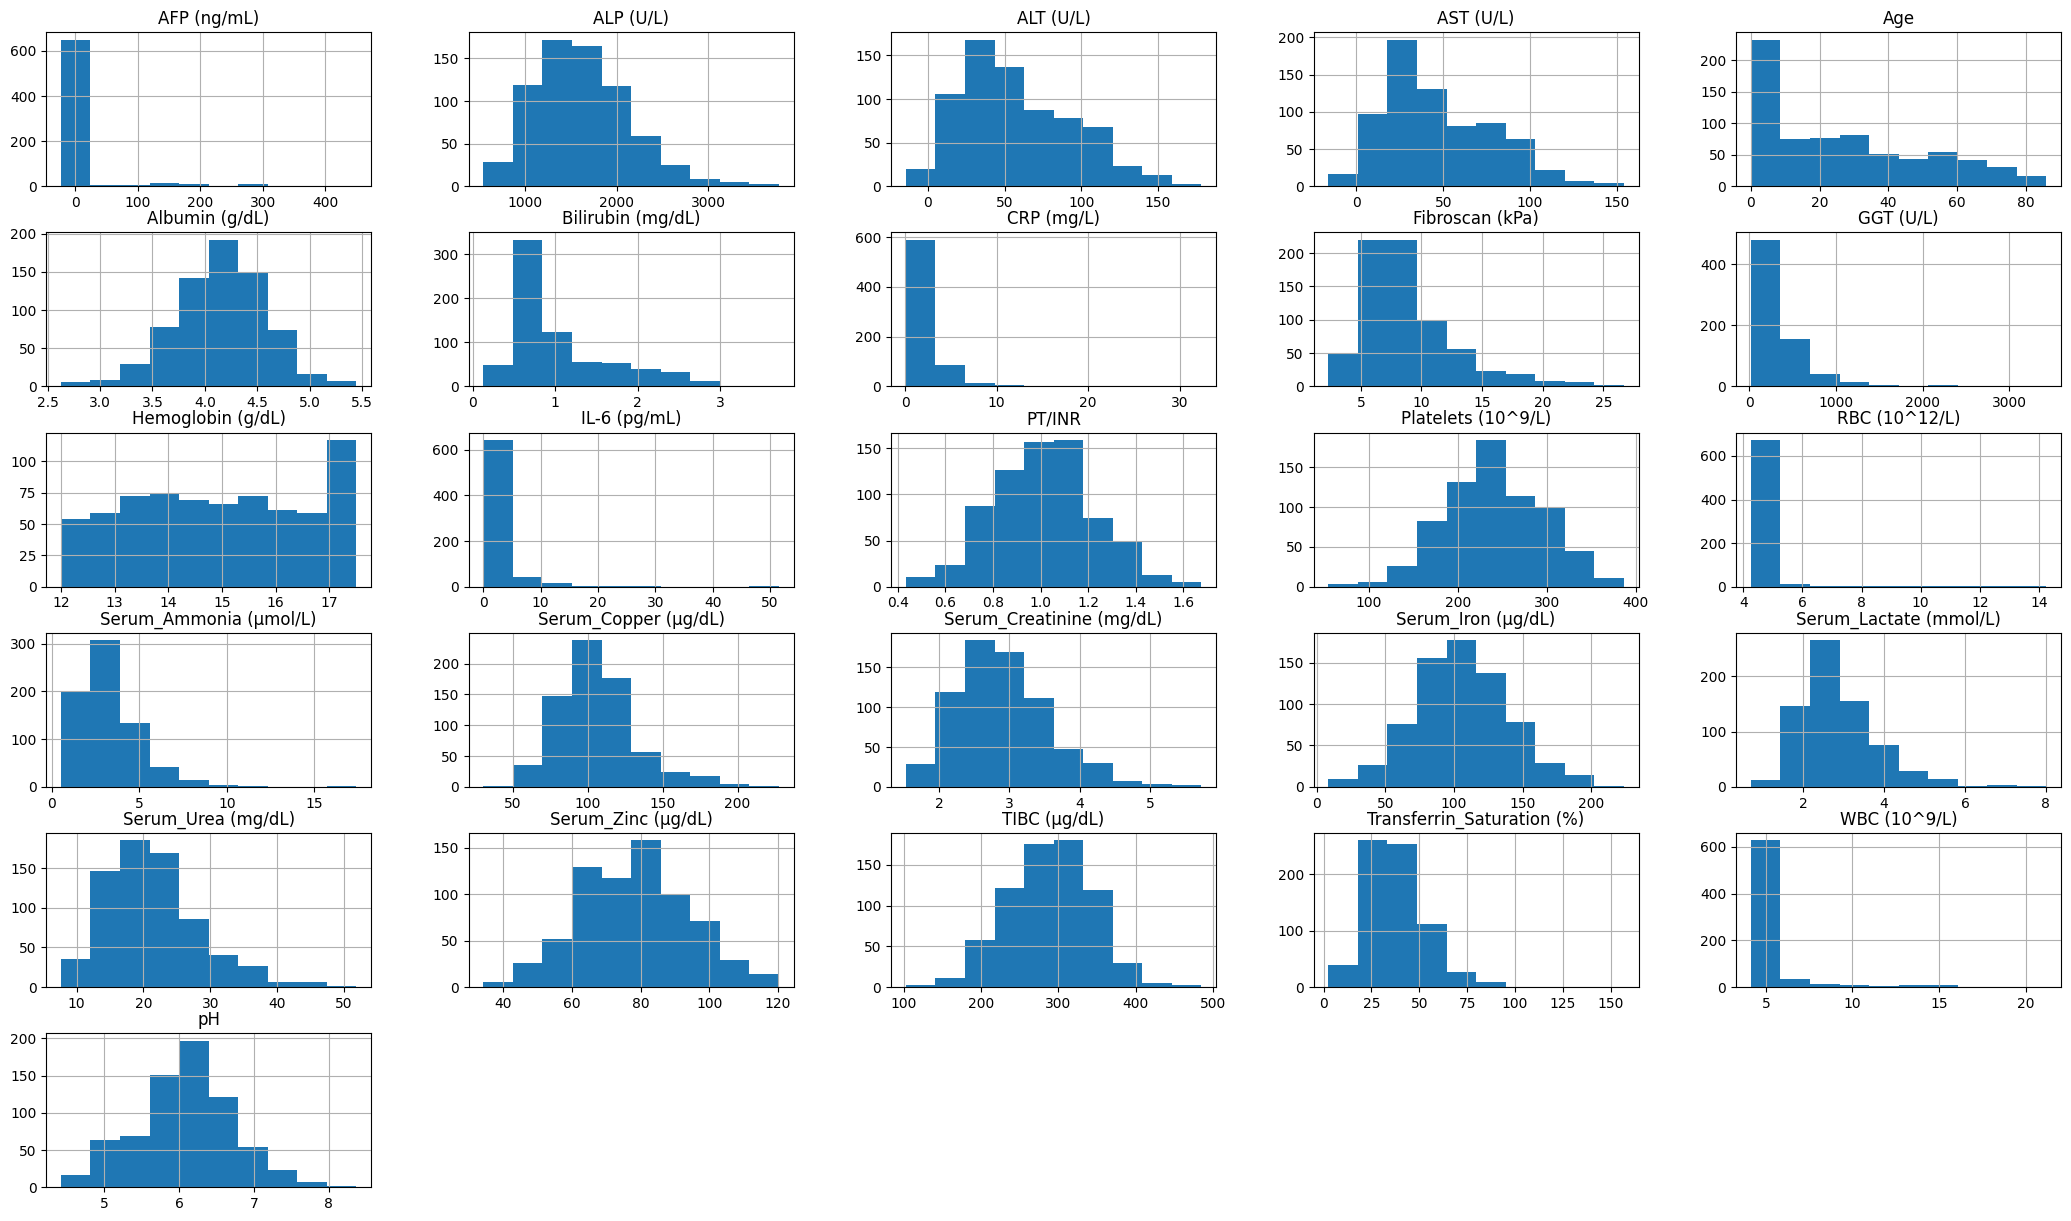

In [395]:
# Plotting histograms for all columns in the dataset
# ==================================================
df_train.hist(bins=10, figsize=(26, 15))
plt.show()


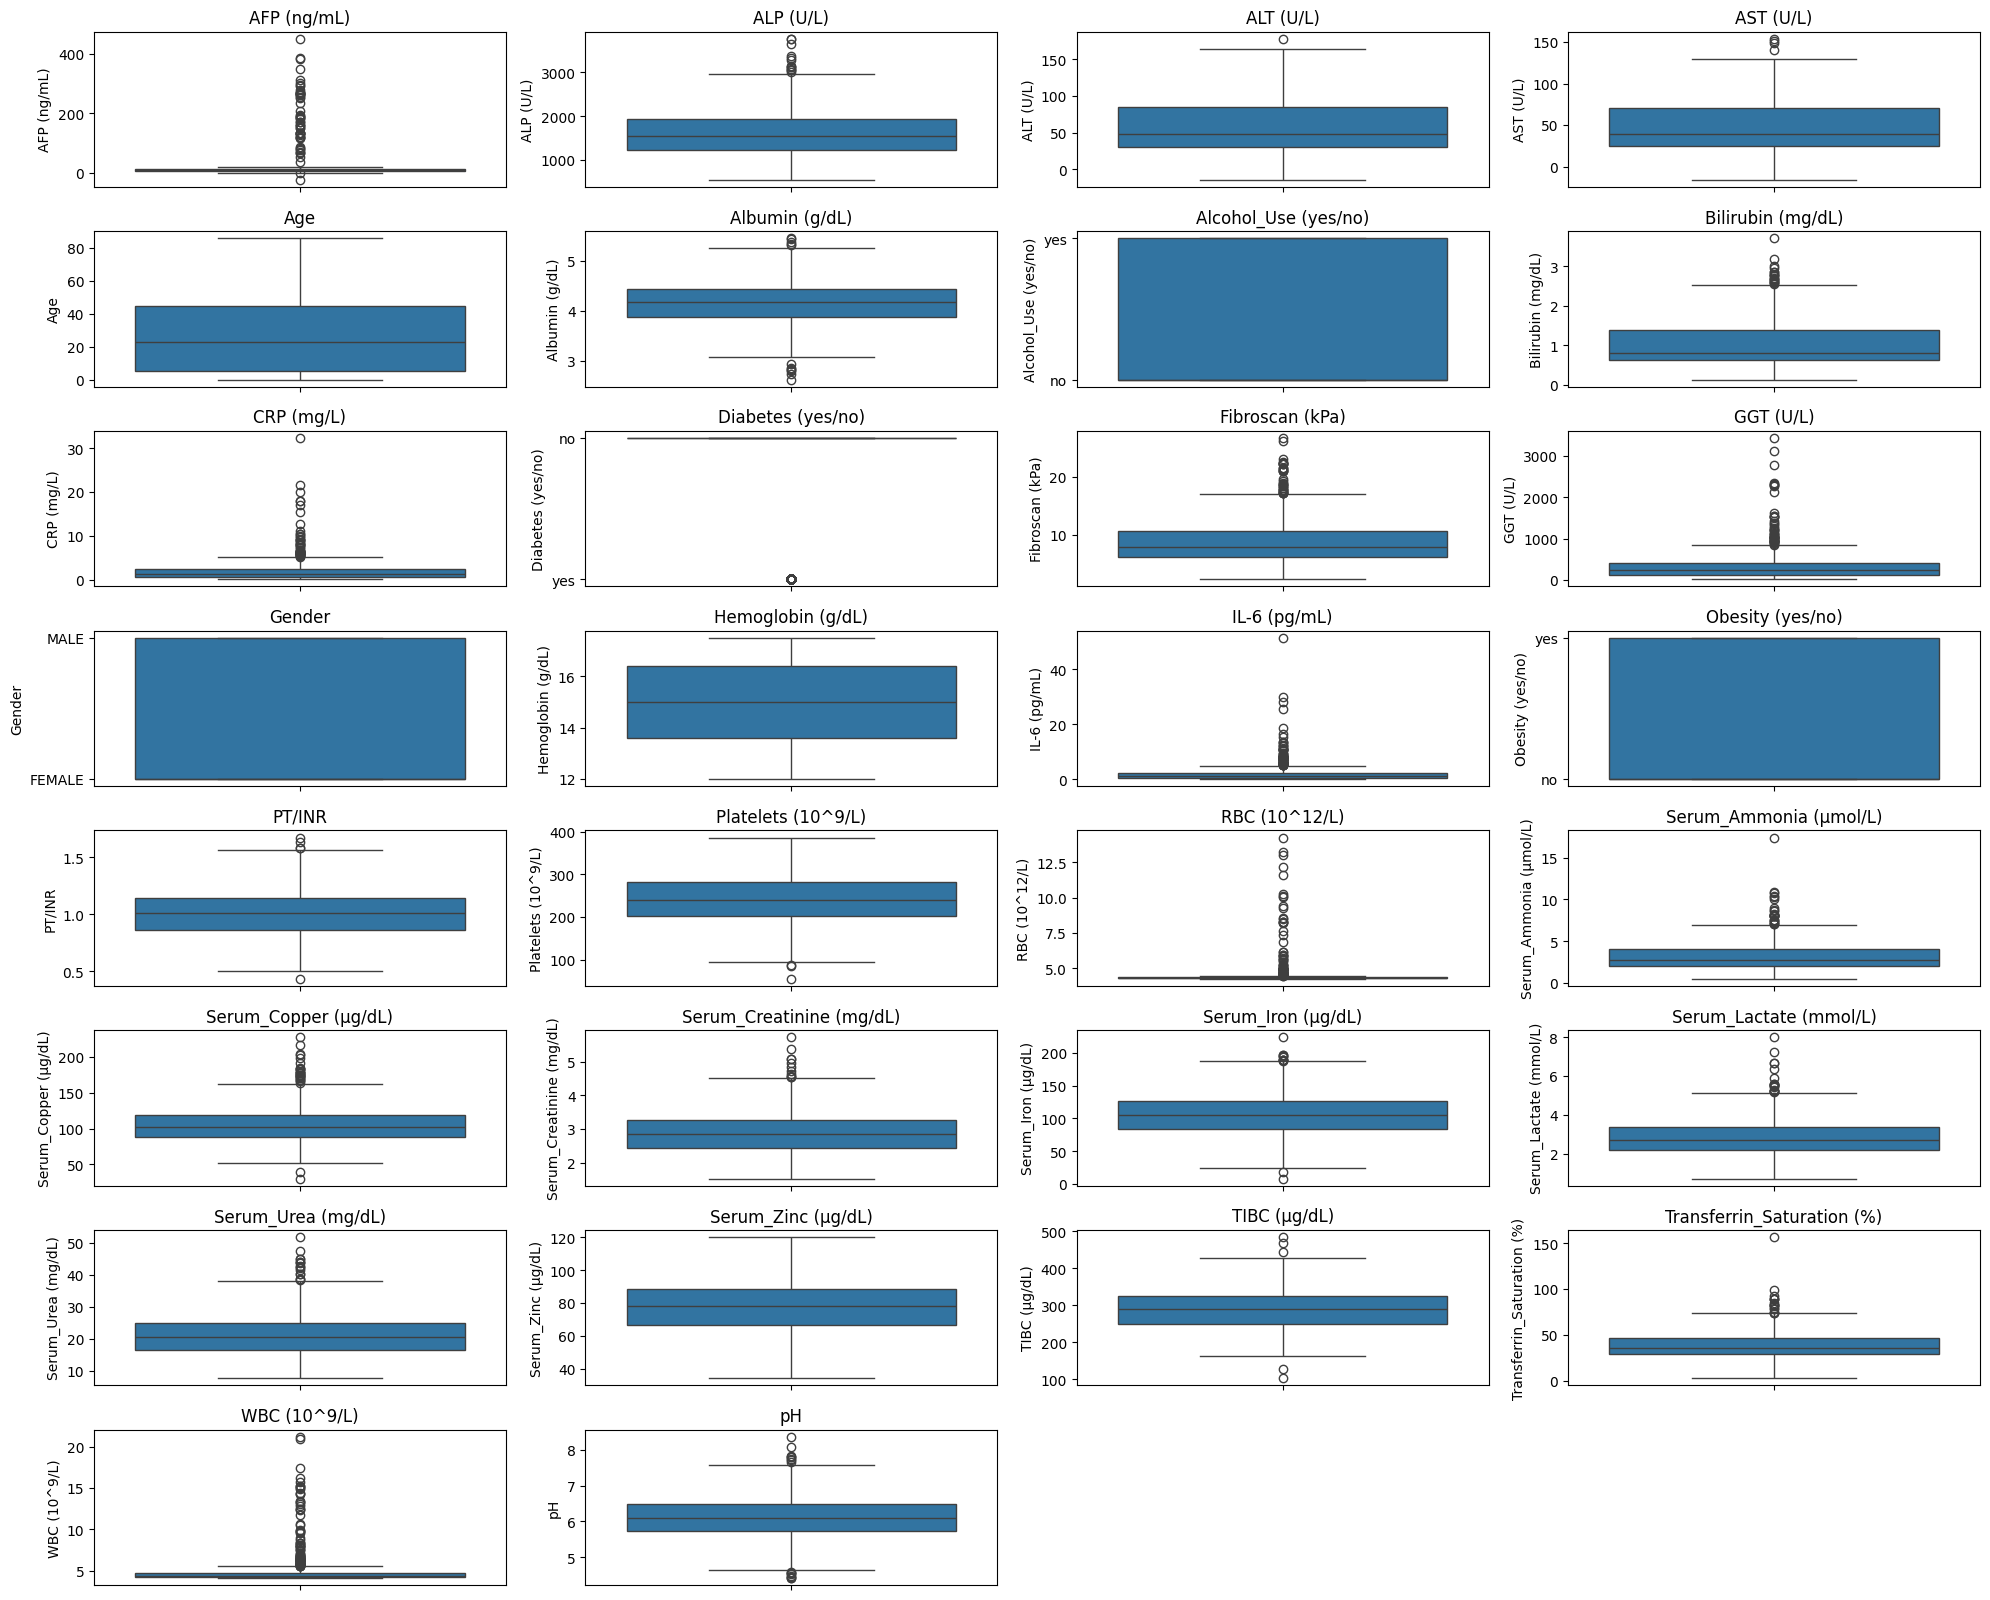

In [396]:
# Removing the target variable
# =============================
features = df_train.columns[:-1]

plt.figure(figsize=(20, 60))

for i, column in enumerate(features):
    plt.subplot(len(features), 4, i + 1)
    sns.boxplot(y=df_train[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

#### Violin Plots

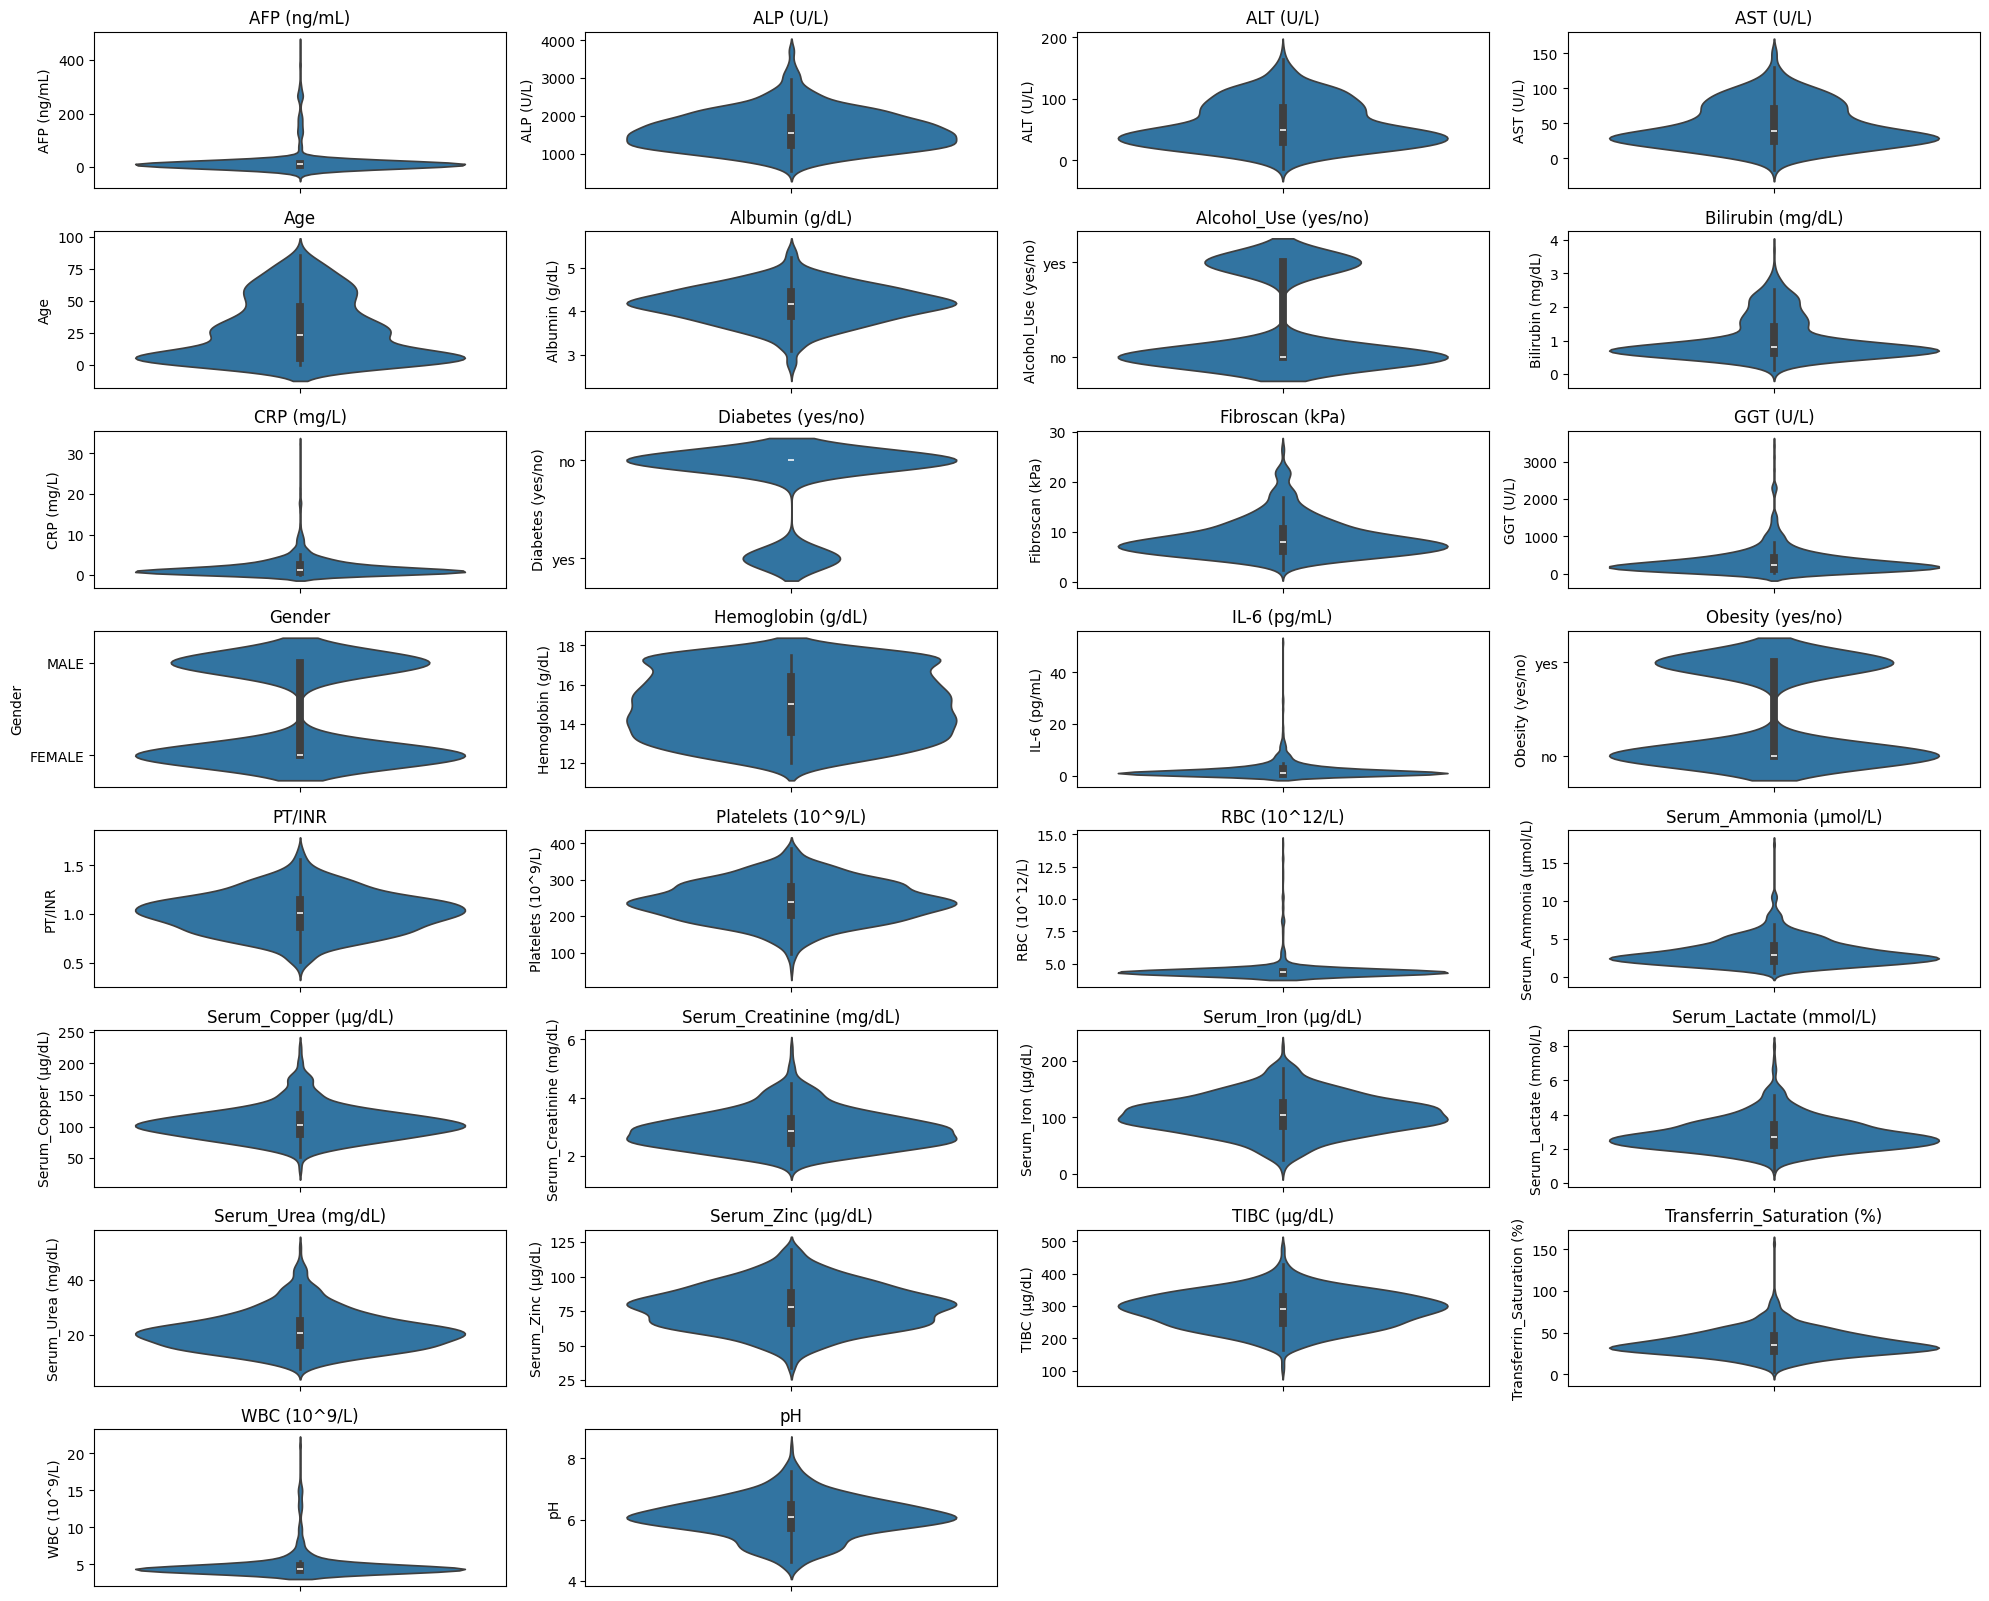

In [397]:
# Removing the target variable
# =============================
features = df_train.columns[:-1]

plt.figure(figsize=(20, 60))

for i, column in enumerate(features):
    plt.subplot(len(features), 4, i + 1)
    sns.violinplot(y=df_train[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### Data cleaning

In [398]:
# Coping the dataset
# ==================
df_train_copy = df_train.copy()

In [399]:
# printing the columns of the dataset
# ====================================
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 702
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AFP (ng/mL)                 703 non-null    float64
 1   ALP (U/L)                   703 non-null    float64
 2   ALT (U/L)                   703 non-null    float64
 3   AST (U/L)                   703 non-null    float64
 4   Age                         703 non-null    int64  
 5   Albumin (g/dL)              703 non-null    float64
 6   Alcohol_Use (yes/no)        703 non-null    object 
 7   Bilirubin (mg/dL)           703 non-null    float64
 8   CRP (mg/L)                  703 non-null    float64
 9   Diabetes (yes/no)           703 non-null    object 
 10  Fibroscan (kPa)             703 non-null    float64
 11  GGT (U/L)                   703 non-null    float64
 12  Gender                      703 non-null    object 
 13  Hemoglobin (g/dL)           703 non-null

#### Handling Catagorical Features

In [400]:
# Storing item of Diagnosis columns
# =================================
diagonosis = df_train_copy['Diagnosis'].unique()

In [401]:
# Creating dictionary from array for diagnosis
# ============================================
diagonosis_dict = dict(zip(diagonosis, range(len(diagonosis))))

In [402]:
# Encoding the class label(Diagnosis) to integers
# ===============================================
df_train_copy['Diagnosis'] = df_train_copy['Diagnosis'].map(diagonosis_dict)

In [491]:
# Converting the catagorical data to numerical data
# =================================================
df_dummies = pd.get_dummies(df_train_copy, drop_first=True)


In [493]:
# Checking the info of the dataset
# ================================
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 702
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AFP (ng/mL)                 703 non-null    float64
 1   ALP (U/L)                   703 non-null    float64
 2   ALT (U/L)                   703 non-null    float64
 3   AST (U/L)                   703 non-null    float64
 4   Age                         703 non-null    int64  
 5   Albumin (g/dL)              703 non-null    float64
 6   Bilirubin (mg/dL)           703 non-null    float64
 7   CRP (mg/L)                  703 non-null    float64
 8   Fibroscan (kPa)             703 non-null    float64
 9   GGT (U/L)                   703 non-null    float64
 10  Hemoglobin (g/dL)           703 non-null    float64
 11  IL-6 (pg/mL)                703 non-null    float64
 12  PT/INR                      703 non-null    float64
 13  Platelets (10^9/L)          703 non-null

In [494]:
# Moving the target variable to the last column
# =============================================
df_dummies = df_dummies[[col for col in df_dummies.columns if col != 'Diagnosis'] + ['Diagnosis']]
df_dummies.head()

,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Bilirubin (mg/dL),CRP (mg/L),Fibroscan (kPa),GGT (U/L),...,Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH,Alcohol_Use (yes/no)_yes,Diabetes (yes/no)_yes,Gender_MALE,Obesity (yes/no)_yes,Diagnosis
0,13.571425,1653.138489,40.405592,45.598427,4,4.477126,0.541997,1.002121,5.501881,311.253072,...,96.124260,315.439318,30.827639,4.180007,6.163600,True,False,True,True,0
1,13.649342,1940.518305,21.336986,34.064095,55,3.190724,1.199063,0.582746,13.902151,264.586392,...,50.554650,268.492437,47.896200,4.590995,5.244266,True,False,True,True,1
2,10.898943,1557.369920,29.665496,16.044488,30,4.506351,0.740952,1.670375,6.961641,66.247224,...,82.900681,312.107620,31.408057,4.524580,5.769592,False,False,False,True,0
3,13.872275,1273.840525,142.418649,64.204257,0,3.665655,1.939879,1.220646,9.193268,78.838414,...,72.360010,182.506010,34.577016,4.234483,5.982228,True,False,True,False,2
4,10.102457,1461.622515,22.437303,23.940205,59,4.005109,0.769535,0.139863,11.827885,246.940466,...,63.216136,212.261519,42.384844,4.306892,4.837404,False,False,False,True,0


#### Removing Outliers

In [496]:
# Removing the outliers from the dataset using IQR method only for numerical data
# ================================================================================
# Taking only the numerical columns 
df_numerical = df_dummies.select_dtypes(include=[np.number])
# Excluding the target variable
df_numerical = df_numerical.drop('Diagnosis', axis=1)
# Calculating the IQR
Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)
IQR = Q3 - Q1
# Removing the outliers
df_numerical_2 = df_numerical[~((df_numerical < (Q1 - 1.5 * IQR)) | (df_numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
df_numerical_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 0 to 701
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AFP (ng/mL)                 309 non-null    float64
 1   ALP (U/L)                   309 non-null    float64
 2   ALT (U/L)                   309 non-null    float64
 3   AST (U/L)                   309 non-null    float64
 4   Age                         309 non-null    int64  
 5   Albumin (g/dL)              309 non-null    float64
 6   Bilirubin (mg/dL)           309 non-null    float64
 7   CRP (mg/L)                  309 non-null    float64
 8   Fibroscan (kPa)             309 non-null    float64
 9   GGT (U/L)                   309 non-null    float64
 10  Hemoglobin (g/dL)           309 non-null    float64
 11  IL-6 (pg/mL)                309 non-null    float64
 12  PT/INR                      309 non-null    float64
 13  Platelets (10^9/L)          309 non-null

##### Using IQR method almost half of the data is getting eliminated so this method doesn't seems good one.
##### In the below I tried the z-score method to clean the data

In [497]:
# Detecting the outliers using the z-score (With the help of lecture note)
# =========================================================================
for column in df_numerical.columns:
    # Calculating the Z-scores for each column
    z_scores = (df_numerical[column] - df_numerical[column].mean()) / df_numerical[column].std()
    
    # Detecting outliers using the absolute value of the Z-scores (threshold of 2)
    outliers = (np.abs(z_scores) > 2)

    print(f"Number of outliers in {column}: {outliers.sum()}")


Number of outliers in AFP (ng/mL): 36
Number of outliers in ALP (U/L): 28
Number of outliers in ALT (U/L): 21
Number of outliers in AST (U/L): 24
Number of outliers in Age: 27
Number of outliers in Albumin (g/dL): 33
Number of outliers in Bilirubin (mg/dL): 45
Number of outliers in CRP (mg/L): 25
Number of outliers in Fibroscan (kPa): 40
Number of outliers in GGT (U/L): 26
Number of outliers in Hemoglobin (g/dL): 0
Number of outliers in IL-6 (pg/mL): 21
Number of outliers in PT/INR: 32
Number of outliers in Platelets (10^9/L): 28
Number of outliers in RBC (10^12/L): 19
Number of outliers in Serum_Ammonia (μmol/L): 28
Number of outliers in Serum_Copper (μg/dL): 35
Number of outliers in Serum_Creatinine (mg/dL): 33
Number of outliers in Serum_Iron (μg/dL): 36
Number of outliers in Serum_Lactate (mmol/L): 31
Number of outliers in Serum_Urea (mg/dL): 33
Number of outliers in Serum_Zinc (μg/dL): 29
Number of outliers in TIBC (μg/dL): 27
Number of outliers in Transferrin_Saturation (%): 29
N

In [498]:
# Printing information of the dataset with numerical columns
# ==========================================================
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 702
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AFP (ng/mL)                 703 non-null    float64
 1   ALP (U/L)                   703 non-null    float64
 2   ALT (U/L)                   703 non-null    float64
 3   AST (U/L)                   703 non-null    float64
 4   Age                         703 non-null    int64  
 5   Albumin (g/dL)              703 non-null    float64
 6   Bilirubin (mg/dL)           703 non-null    float64
 7   CRP (mg/L)                  703 non-null    float64
 8   Fibroscan (kPa)             703 non-null    float64
 9   GGT (U/L)                   703 non-null    float64
 10  Hemoglobin (g/dL)           703 non-null    float64
 11  IL-6 (pg/mL)                703 non-null    float64
 12  PT/INR                      703 non-null    float64
 13  Platelets (10^9/L)          703 non-null

In [501]:
# Removing the outliers from the dataset using Z-score method only for numerical data (With the help of lecture note)
# ===================================================================================================================
for column in df_numerical.columns:
    # Calculate the z-scores for each column
    z_scores = (df_numerical[column] - df_numerical[column].mean()) / df_numerical[column].std()
    
    # Only keep rows in dataframe where the z-score is less than 2 standard deviations
    df_numerical_3 = df_numerical[np.abs(z_scores) < 2]

# Checking the information of the dataset
df_numerical_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 0 to 702
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AFP (ng/mL)                 668 non-null    float64
 1   ALP (U/L)                   668 non-null    float64
 2   ALT (U/L)                   668 non-null    float64
 3   AST (U/L)                   668 non-null    float64
 4   Age                         668 non-null    int64  
 5   Albumin (g/dL)              668 non-null    float64
 6   Bilirubin (mg/dL)           668 non-null    float64
 7   CRP (mg/L)                  668 non-null    float64
 8   Fibroscan (kPa)             668 non-null    float64
 9   GGT (U/L)                   668 non-null    float64
 10  Hemoglobin (g/dL)           668 non-null    float64
 11  IL-6 (pg/mL)                668 non-null    float64
 12  PT/INR                      668 non-null    float64
 13  Platelets (10^9/L)          668 non-null

##### This seems little bit more promising than the IQR. In the next steps both datasets with outliers and without outliers will be used.

In [507]:
# Merging the numerical columns with the catagorical columns based on the index column
# ====================================================================================
rest_columns = ['Alcohol_Use (yes/no)_yes', 'Diabetes (yes/no)_yes', 
                    'Gender_MALE', 'Obesity (yes/no)_yes', 'Diagnosis']
df_cleaned = pd.merge(df_numerical_3, df_dummies[rest_columns], left_index=True, right_index=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 0 to 702
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AFP (ng/mL)                 668 non-null    float64
 1   ALP (U/L)                   668 non-null    float64
 2   ALT (U/L)                   668 non-null    float64
 3   AST (U/L)                   668 non-null    float64
 4   Age                         668 non-null    int64  
 5   Albumin (g/dL)              668 non-null    float64
 6   Bilirubin (mg/dL)           668 non-null    float64
 7   CRP (mg/L)                  668 non-null    float64
 8   Fibroscan (kPa)             668 non-null    float64
 9   GGT (U/L)                   668 non-null    float64
 10  Hemoglobin (g/dL)           668 non-null    float64
 11  IL-6 (pg/mL)                668 non-null    float64
 12  PT/INR                      668 non-null    float64
 13  Platelets (10^9/L)          668 non-null

#### Visualizing after cleaning

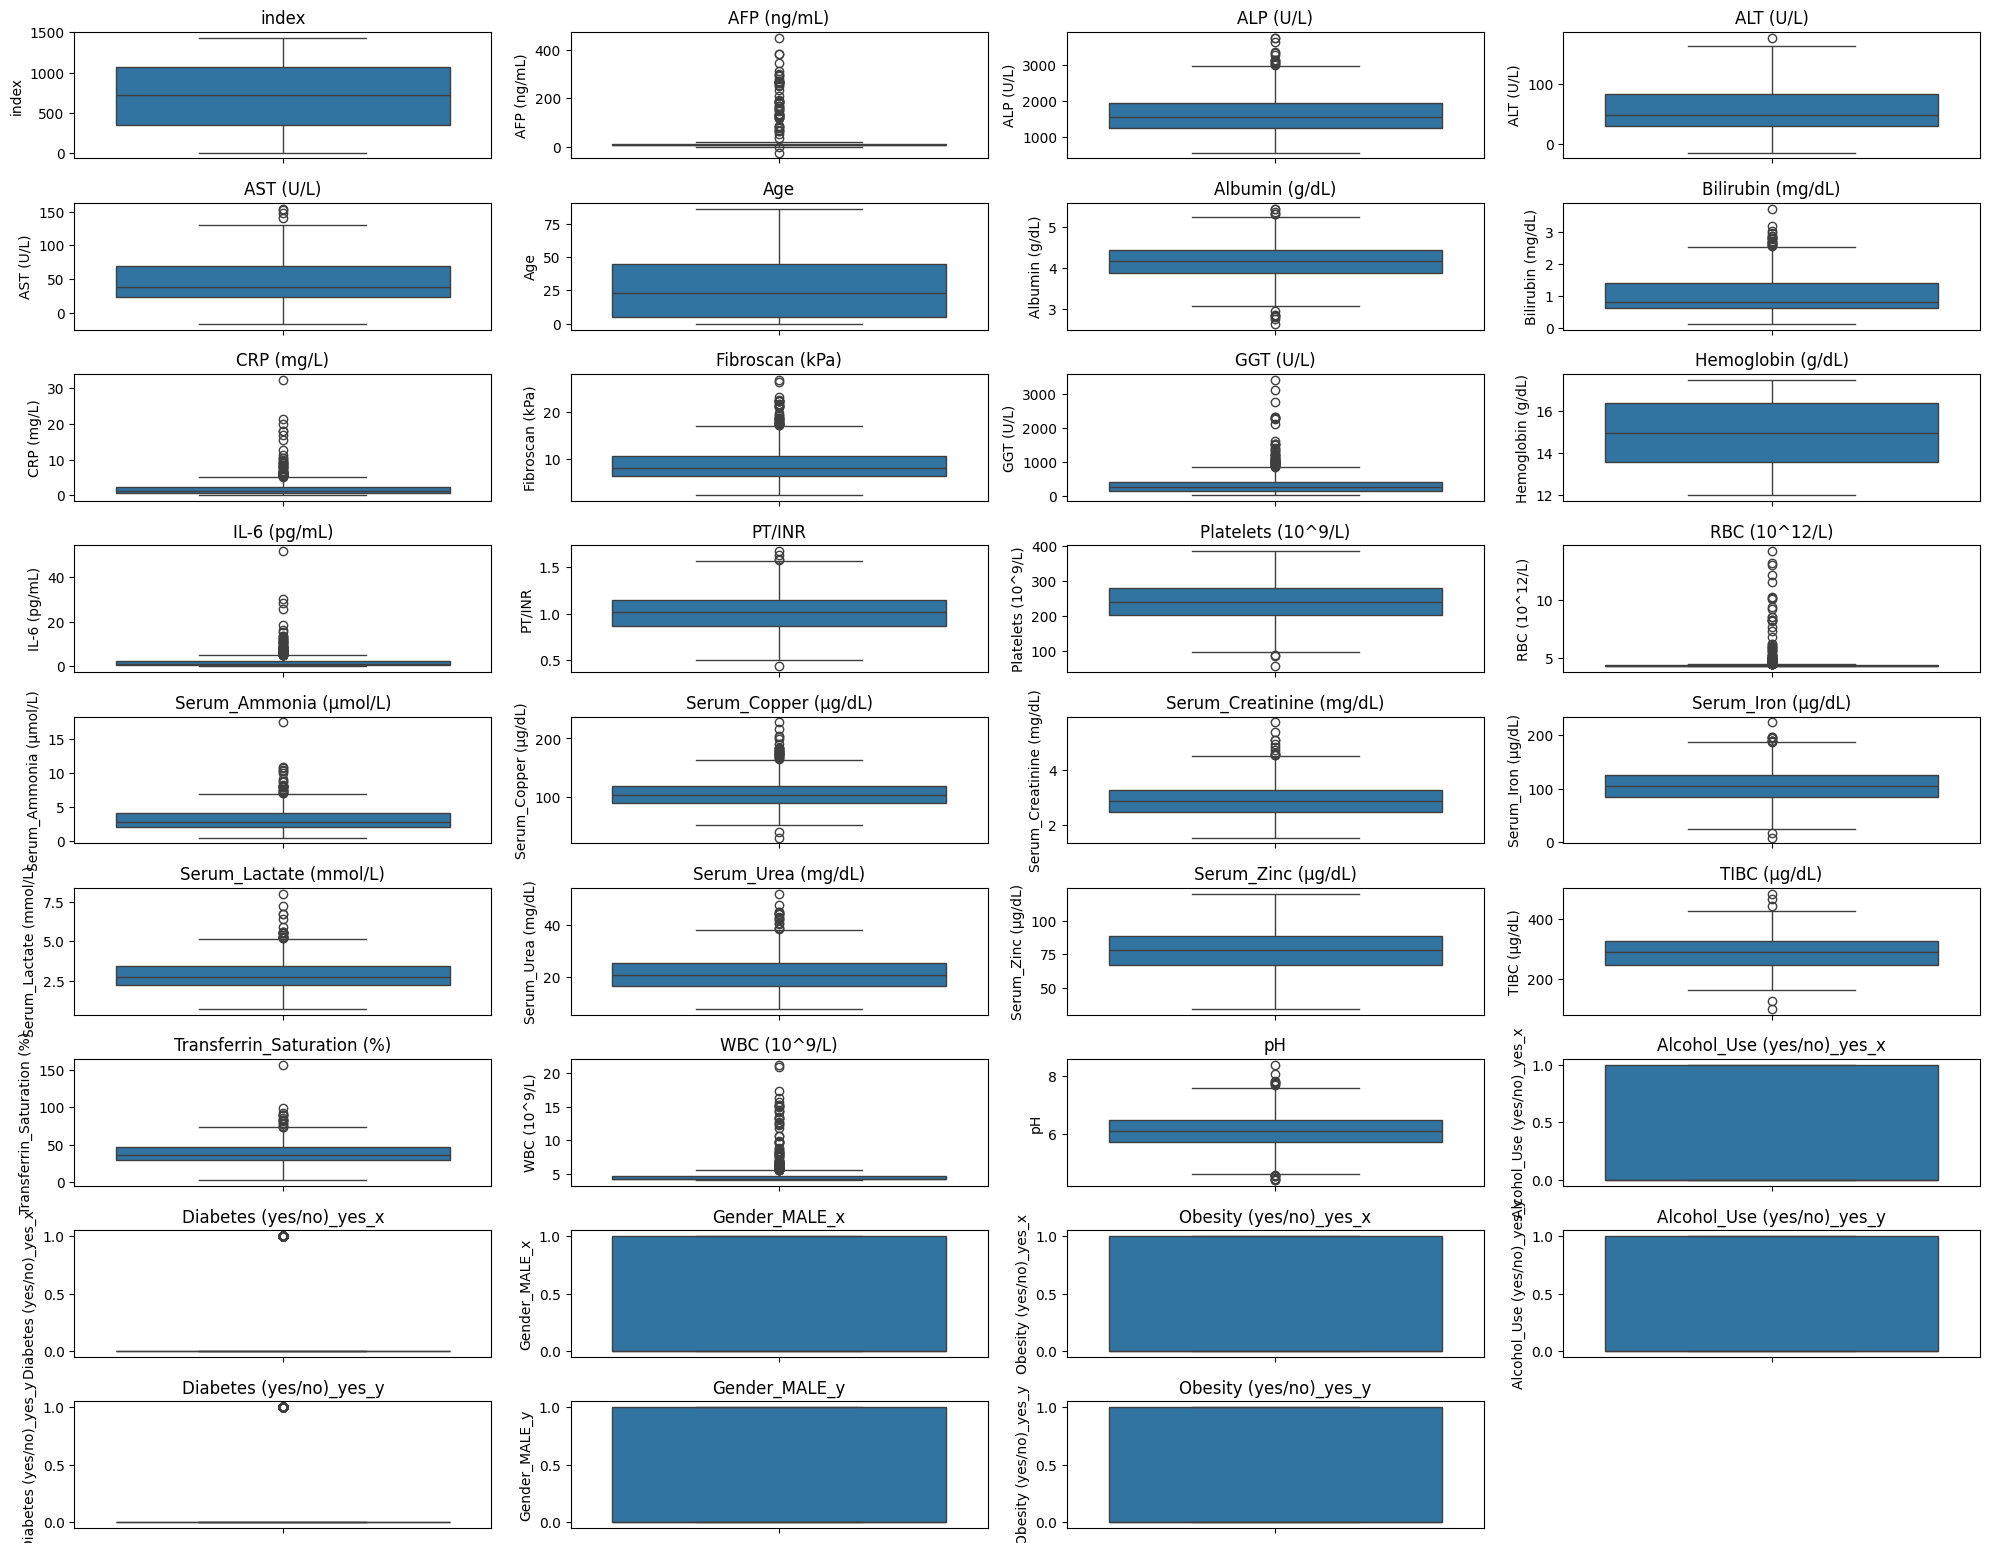

In [379]:
# Removing the target variable
# =============================
features = df_cleaned.columns[:-1]

plt.figure(figsize=(20, 60))

for i, column in enumerate(features):
    plt.subplot(len(features), 4, i + 1)
    sns.boxplot(y=df_cleaned[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

##### Still shows a lot of Outliers.

### Data preprocessing and visualisation

#### Splitting the Dataset

In [509]:
#-------------------------------------------------
# Spliting the cleaned dataset into test and train
#-------------------------------------------------
X_cleaned = df_cleaned.drop('Diagnosis', axis=1)
y_cleaned = df_cleaned['Diagnosis']

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [510]:
#------------------------------------------------------
# Spliting the dataset with outlier into test and train
#------------------------------------------------------
X = df_dummies.drop('Diagnosis', axis=1)
y = df_dummies['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exploring training data after cleaning and splitting

In [511]:
X_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 0 to 702
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AFP (ng/mL)                 668 non-null    float64
 1   ALP (U/L)                   668 non-null    float64
 2   ALT (U/L)                   668 non-null    float64
 3   AST (U/L)                   668 non-null    float64
 4   Age                         668 non-null    int64  
 5   Albumin (g/dL)              668 non-null    float64
 6   Bilirubin (mg/dL)           668 non-null    float64
 7   CRP (mg/L)                  668 non-null    float64
 8   Fibroscan (kPa)             668 non-null    float64
 9   GGT (U/L)                   668 non-null    float64
 10  Hemoglobin (g/dL)           668 non-null    float64
 11  IL-6 (pg/mL)                668 non-null    float64
 12  PT/INR                      668 non-null    float64
 13  Platelets (10^9/L)          668 non-null

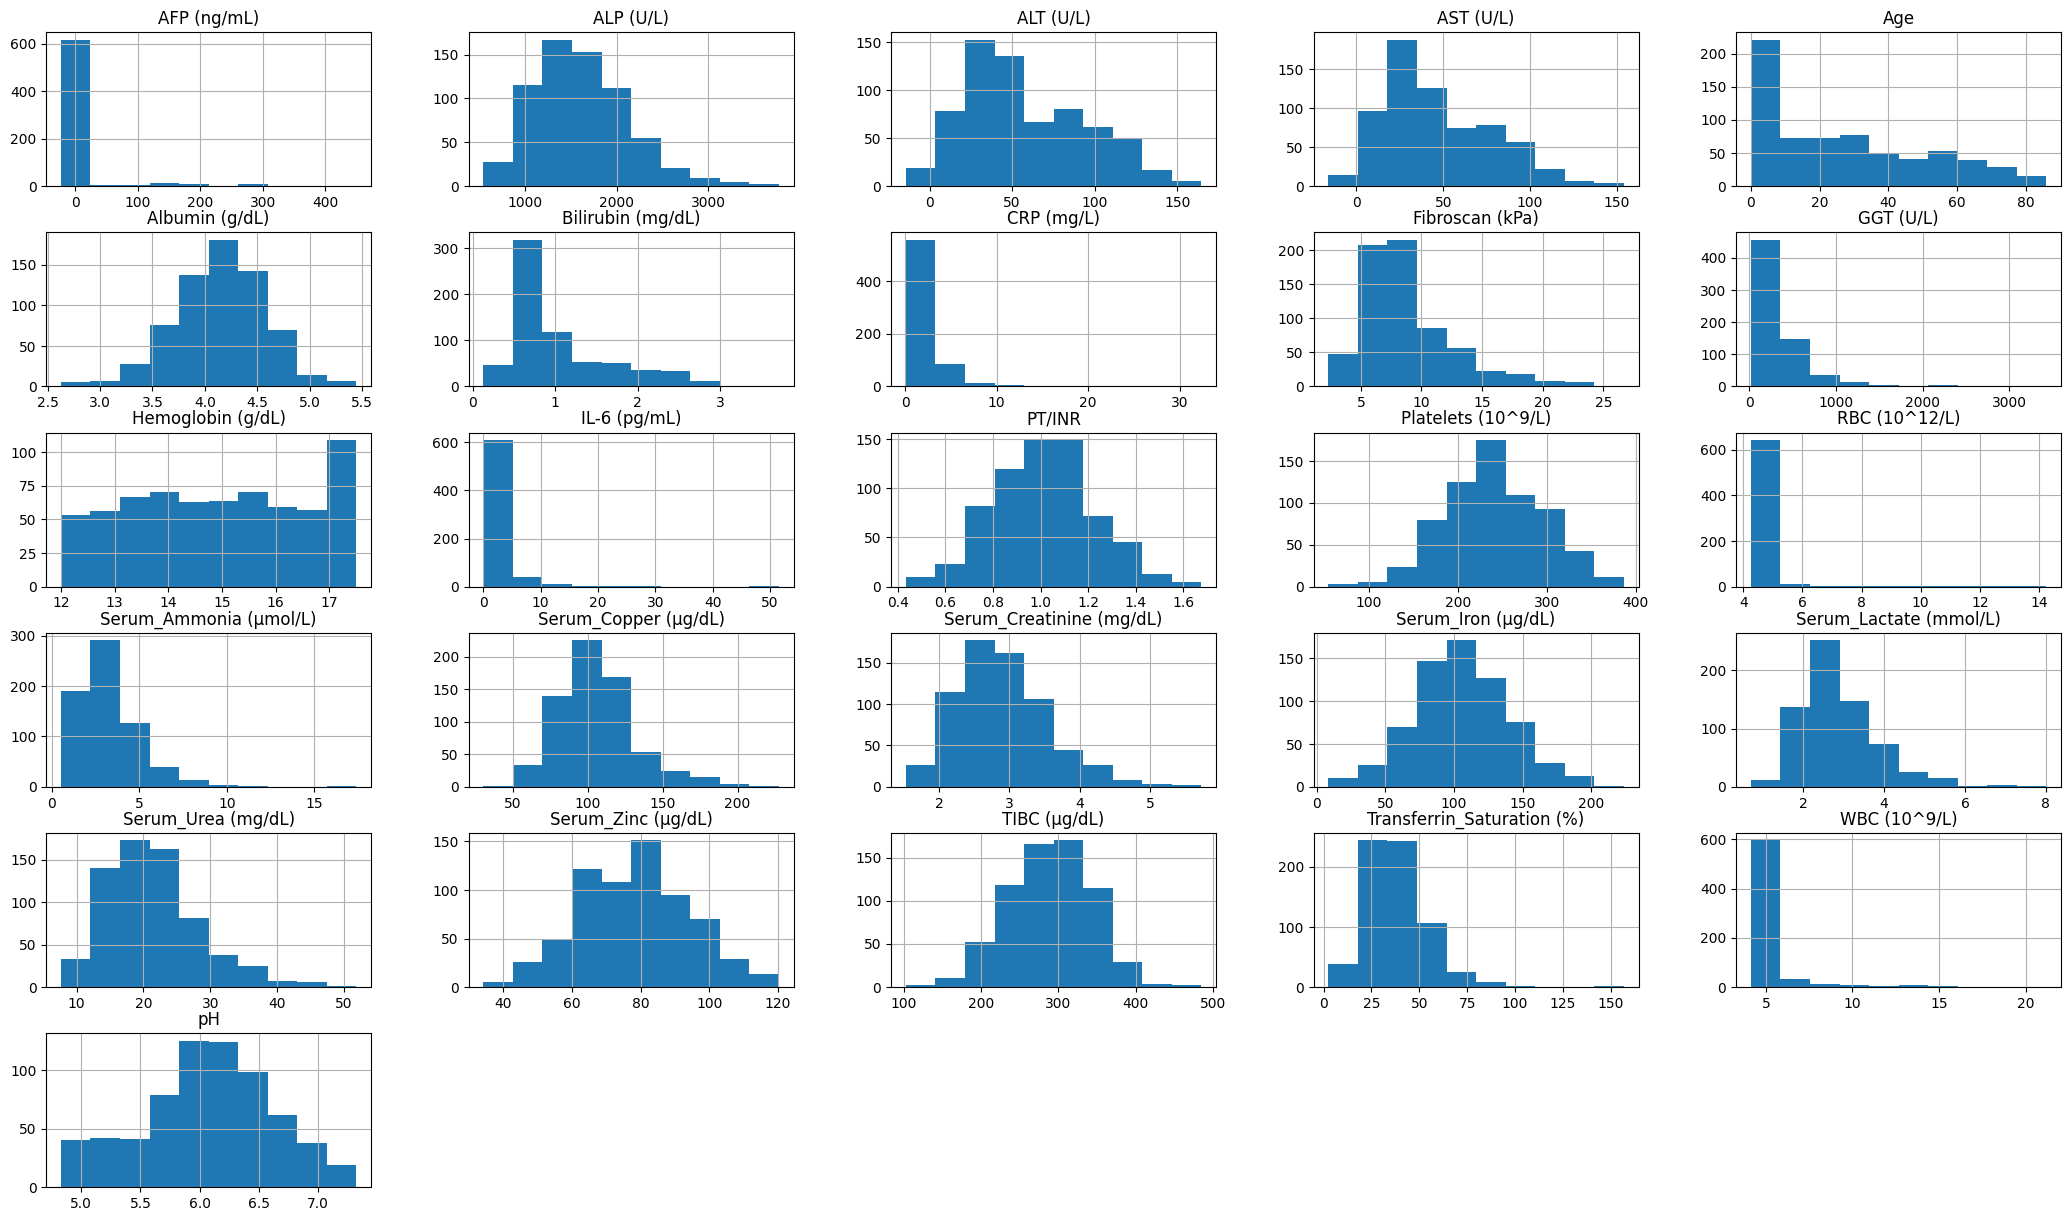

In [514]:
# Plotting histograms for all columns in the dataset
# ==================================================
X_cleaned.hist(bins=10, figsize=(26, 15))
plt.show()

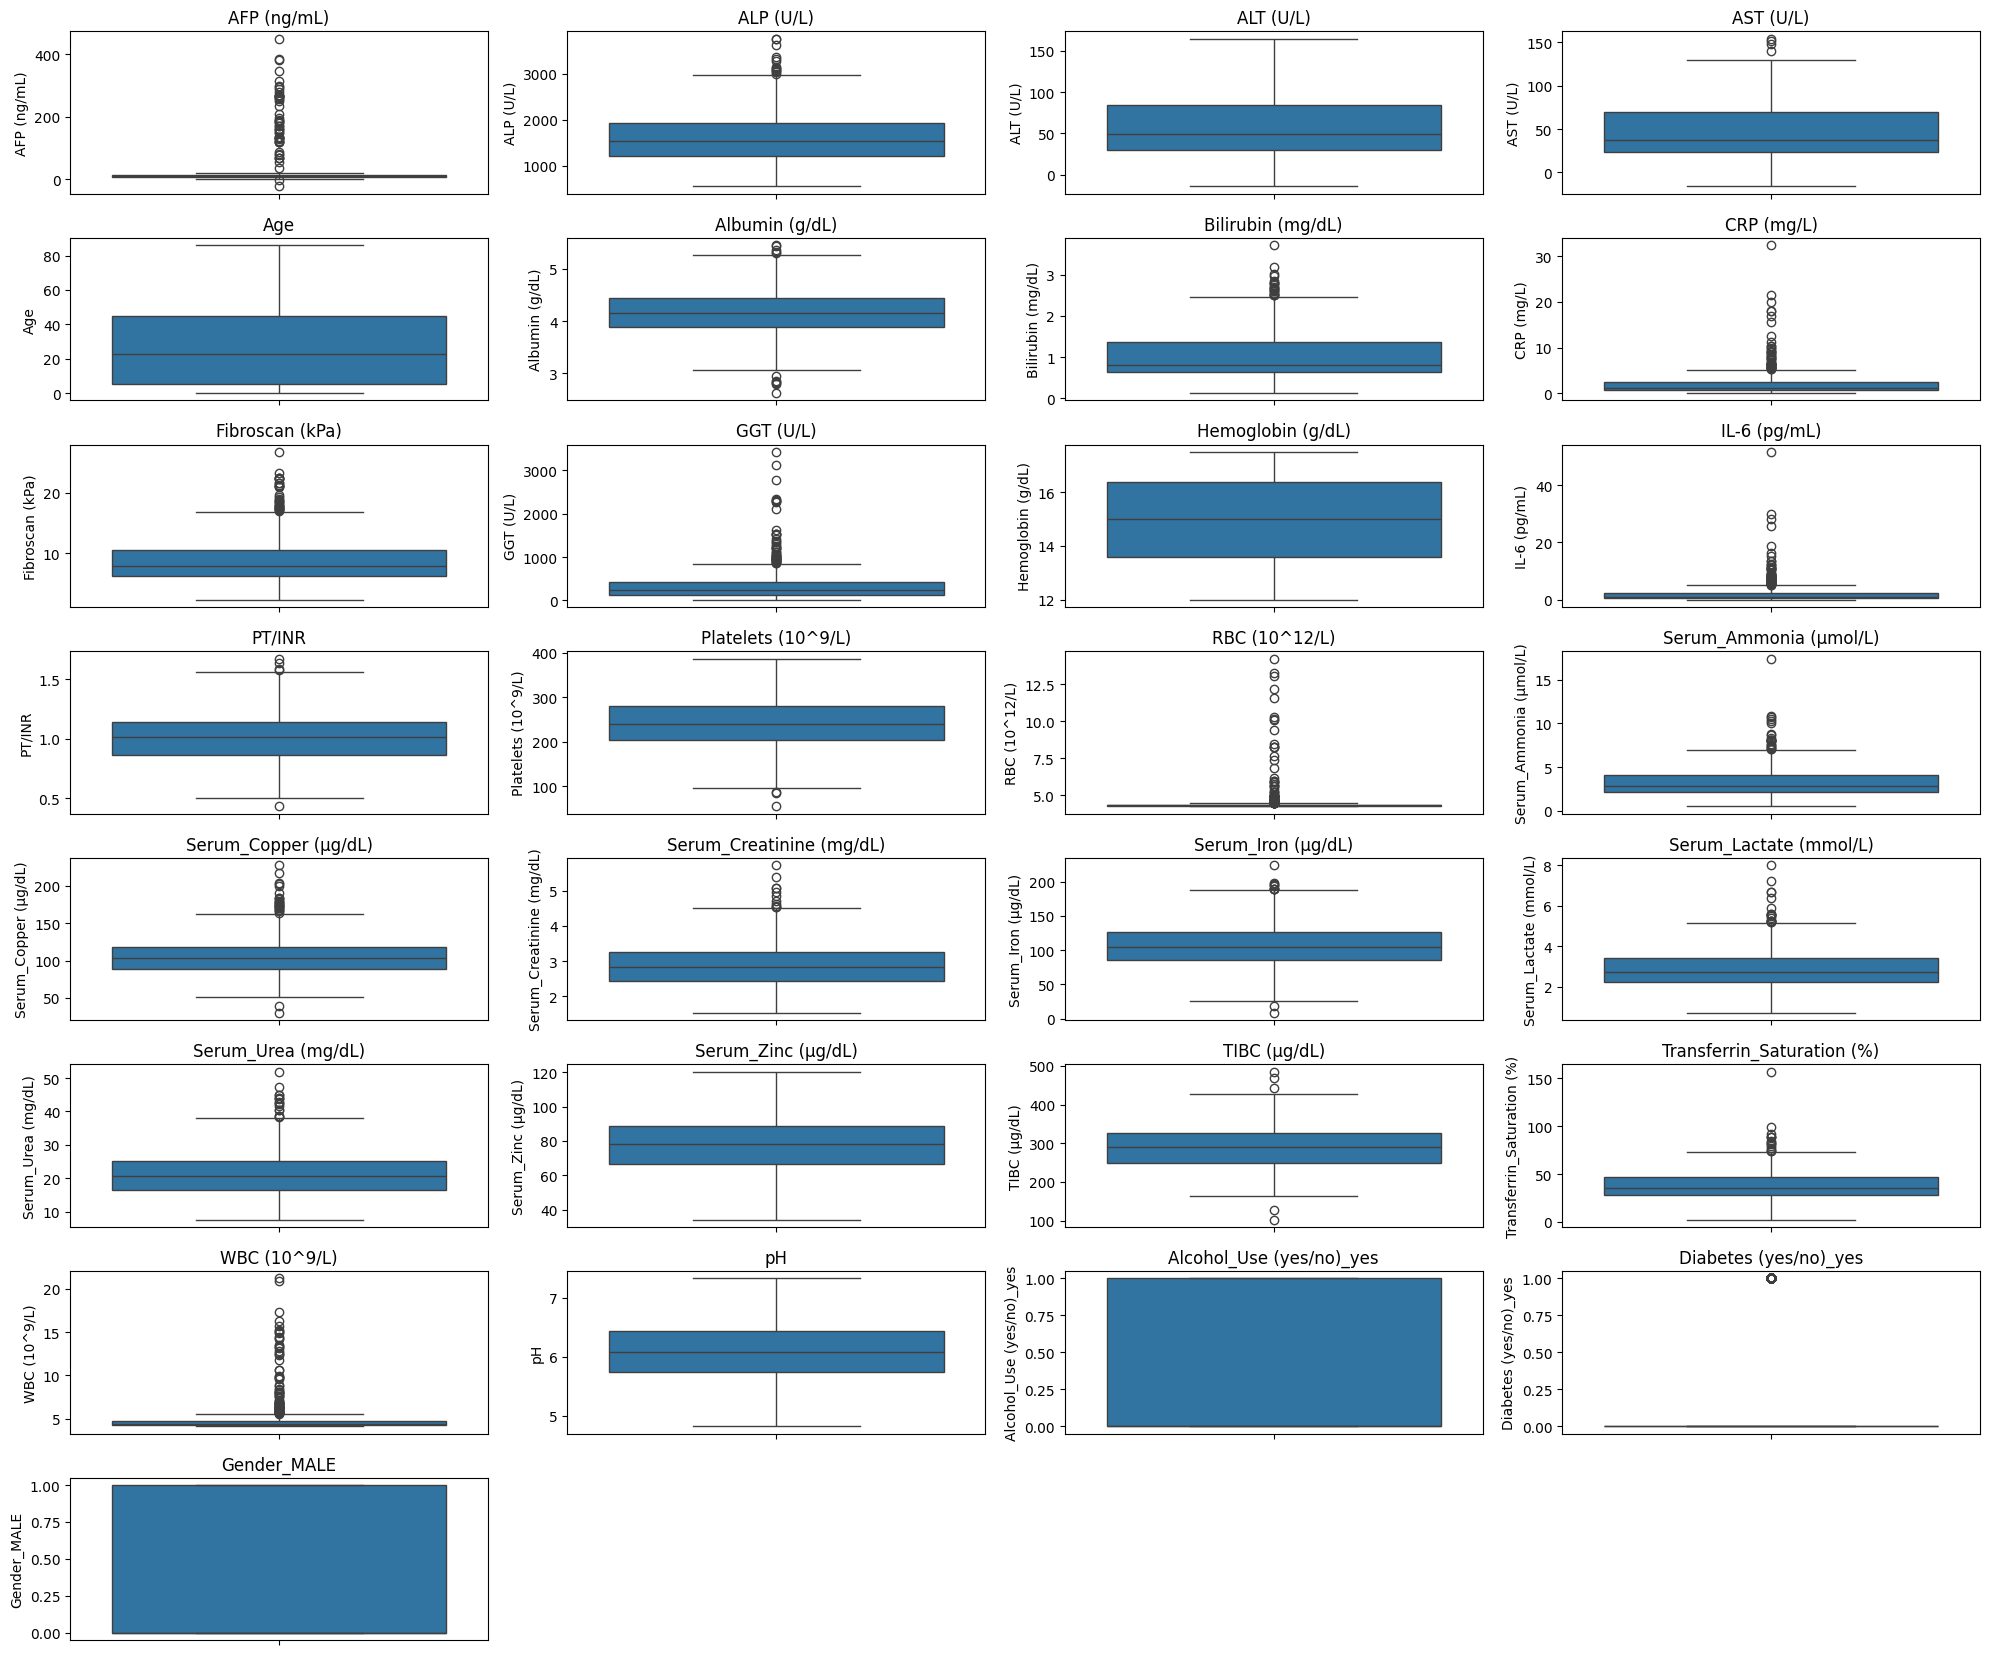

In [515]:
# Plotting the Boxplot for the cleaned dataset i.e X_train_cleaned_sc_df
# ======================================================================
features = X_cleaned.columns[:-1]

plt.figure(figsize=(20, 60))

for i, column in enumerate(features):
    plt.subplot(len(features), 4, i + 1)
    sns.boxplot(y=X_cleaned[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

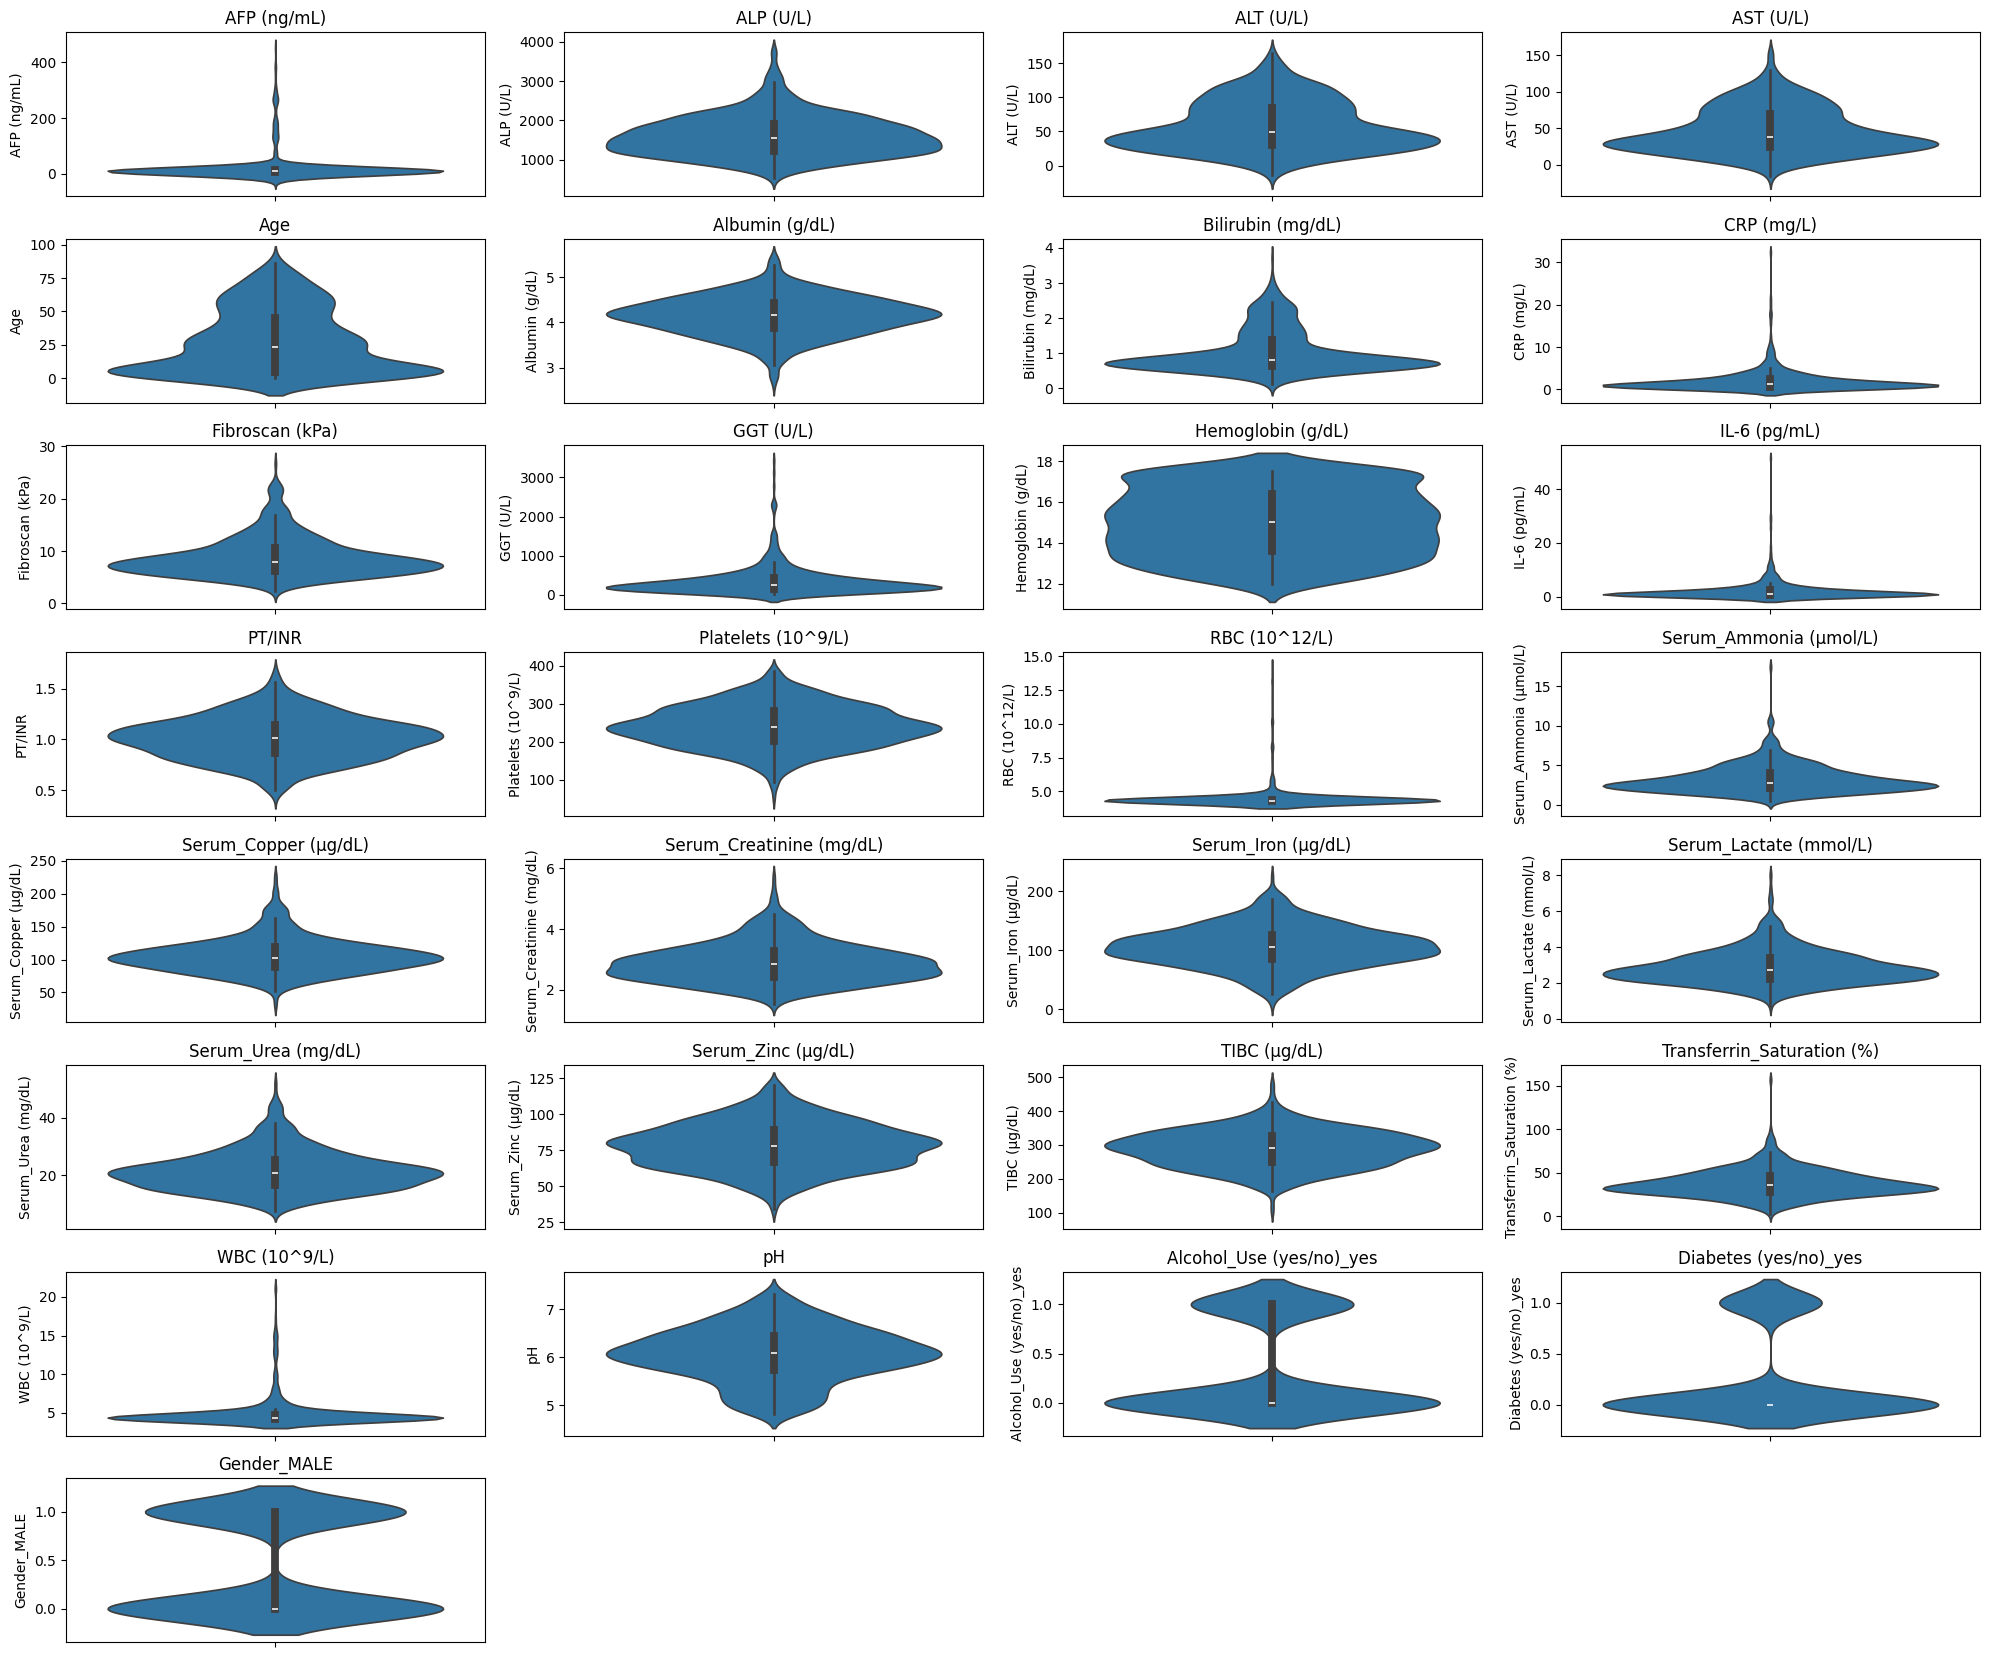

In [516]:
# Plotting the Violin plot for the cleaned dataset i.e X_train_cleaned_sc_df
# ==========================================================================
features = X_cleaned.columns[:-1]

plt.figure(figsize=(20, 60))

for i, column in enumerate(features):
    plt.subplot(len(features), 4, i + 1)
    sns.violinplot(y=X_cleaned[column])
    plt.title(column)

plt.tight_layout()
plt.show()


### Modelling

#### Pipelining with Kernel

In [517]:
# Defining the pipeline with kernel(SVC) and pca
# ==============================================
pipe_svc_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC())
])

# Defining the parameters for the grid search
# ===========================================
param_grid_svc_pca = {
    'pca__n_components': [0.9, 0.95, 0.99],
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [518]:
# Defining the grid search
# ========================
grid_search_svc_pca = GridSearchCV(estimator=pipe_svc_pca, param_grid=param_grid_svc_pca, scoring='f1_macro', cv=5)

In [519]:
# Fitting the grid search
# =======================
grid_search_svc_pca.fit(X_train_cleaned, y_train_cleaned)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid'],
                         'pca__n_components': [0.9, 0.95, 0.99]},
             scoring='f1_macro')

In [520]:
# Printing the best parameters
# ============================
print(f"Best parameters: {grid_search_svc_pca.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_svc_pca.best_score_}")

Best parameters: {'classifier__C': 1, 'classifier__kernel': 'sigmoid', 'pca__n_components': 0.95}
Best score: 0.7424156305547781


In [521]:
# Defining the pipeline with kernel(SVC) and lda
# ==============================================
pipe_svc_lda = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LDA()),
    ('classifier', SVC())
])

# Defining the parameters for the grid search
# ===========================================
param_grid_svc_lda= {
    'lda__n_components': [1, 2],
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}


In [522]:
# Defining the grid search
# ========================
grid_search_svc_lda = GridSearchCV(estimator=pipe_svc_lda, param_grid=param_grid_svc_lda, scoring='f1_macro', cv=5)

In [523]:
# Fitting the grid search
# =======================
grid_search_svc_lda.fit(X_train_cleaned, y_train_cleaned)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lda', LinearDiscriminantAnalysis()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid'],
                         'lda__n_components': [1, 2]},
             scoring='f1_macro')

In [524]:
# Printing the best parameters
# ============================
print(f"Best parameters: {grid_search_svc_lda.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_svc_lda.best_score_}")

Best parameters: {'classifier__C': 10, 'classifier__kernel': 'linear', 'lda__n_components': 2}
Best score: 0.4884996676523051


##### Pipelining with Regularization

In [526]:
# Defining the pipeline with Regulization(LogisticRegression) and pca
# ===================================================================
pipe_lr_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', LogisticRegression())
])

# Defining the parameters for the grid search
# ===========================================
param_grid_lr_pca = {
    'pca__n_components': [0.9, 0.95, 0.99],
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}

In [527]:
# Defining the grid search
# ========================
grid_search_lr_pca = GridSearchCV(estimator=pipe_lr_pca, param_grid=param_grid_lr_pca, scoring='f1_macro', cv=5)

In [528]:
# Fitting the grid search
# =======================
grid_search_lr_pca.fit(X_train_cleaned, y_train_cleaned)

/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklear

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2'],
                         'pca__n_components': [0.9, 0.95, 0.99]},
             scoring='f1_macro')

In [529]:
# Printing the best parameters
# ============================
print(f"Best parameters: {grid_search_lr_pca.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_lr_pca.best_score_}")

Best parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'pca__n_components': 0.99}
Best score: 0.7405669117166076


In [ ]:
# Defining the pipeline with Regulization(LogisticRegression) and lda
# ===================================================================
pipe_lr_lda = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LDA()),
    ('classifier', LogisticRegression())
])

# Defining the parameters for the grid search
# ===========================================
param_grid_lr_lda = {
    'lda__n_components': [1, 2],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

In [ ]:
# Defining the grid search
# ========================
grid_search_lr_lda = GridSearchCV(estimator=pipe_lr_lda, param_grid=param_grid_lr_lda, scoring='f1_macro', cv=5)

In [ ]:
# Fitting the grid search
# =======================
grid_search_lr_lda.fit(X_train_cleaned, y_train_cleaned)

/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklea

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lda', LinearDiscriminantAnalysis()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2'],
                         'lda__n_components': [1, 2]},
             scoring='f1_macro')

In [ ]:
# Printing the best parameters
# ============================
print(f"Best parameters: {grid_search_lr_lda.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_lr_lda.best_score_}")

Best parameters: {'classifier__C': 100, 'classifier__penalty': 'l2', 'lda__n_components': 2}
Best score: 0.50567582960442


In [ ]:
# Defining the pipeline with RandomForestClassifier and pca
# =========================================================
pipe_rf_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier())
])

# Defining the parameters for the grid search with f1 macro average as scoring
# ============================================================================
param_grid_rf_pca = {
    'pca__n_components': [0.9, 0.95, 0.99],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15, 20],
}

# Defining the grid search
# ========================
grid_search_rf_pca = GridSearchCV(estimator=pipe_rf_pca, param_grid=param_grid_rf_pca, scoring='f1_macro', cv=5)

# Fitting the grid search(for cleaned dataset)
# ============================================
grid_search_rf_pca.fit(X_train_cleaned, y_train_cleaned)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [5, 10, 15, 20],
                         'classifier__n_estimators': [100, 200, 300],
                         'pca__n_components': [0.9, 0.95, 0.99]},
             scoring='f1_macro')

In [ ]:
# Printing the best parameters
# ============================
print(f"Best parameters: {grid_search_rf_pca.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_rf_pca.best_score_}")

Best parameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 300, 'pca__n_components': 0.99}
Best score: 0.6654014631167522


In [ ]:
# Defining the pipeline with RandomForestClassifier and lda
# =========================================================
pipe_rf_lda = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LDA()),
    ('classifier', RandomForestClassifier())
])

# Defining the parameters for the grid search
# ===========================================
param_grid_rf_lda = {
    'lda__n_components': [1, 2],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15, 20]
}

# Defining the grid search
# ========================
grid_search_rf_lda = GridSearchCV(estimator=pipe_rf_lda, param_grid=param_grid_rf_lda, scoring='f1_macro', cv=5)

# Fitting the grid search(for cleaned dataset)
# ============================================
grid_search_rf_lda.fit(X_train_cleaned, y_train_cleaned)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lda', LinearDiscriminantAnalysis()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [5, 10, 15, 20],
                         'classifier__n_estimators': [100, 200, 300],
                         'lda__n_components': [1, 2]},
             scoring='f1_macro')

In [ ]:
# Printing the best parameters
# ============================
print(f"Best parameters: {grid_search_rf_lda.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_rf_lda.best_score_}")

Best parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 200, 'lda__n_components': 2}
Best score: 0.5107671041902294


In [ ]:
# Defining the pipeline with RandomForestClassifier
# =================================================
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Defining the parameters for the grid search
# ===========================================
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15, 20]
}

# Defining the grid search
# ========================
grid_search_rf = GridSearchCV(estimator=pipe_rf, param_grid=param_grid_rf, scoring='f1_macro', cv=5)

# Fitting the grid search(for cleaned dataset)
# ============================================
grid_search_rf.fit(X_train_cleaned, y_train_cleaned)

# Printing the best parameters
# ============================
print(f"Best parameters: {grid_search_rf.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_rf.best_score_}")

Best parameters: {'classifier__max_depth': 15, 'classifier__n_estimators': 300}
Best score: 0.7469526003955284


#### Confusion Matrix for the best model with a 60-40 split

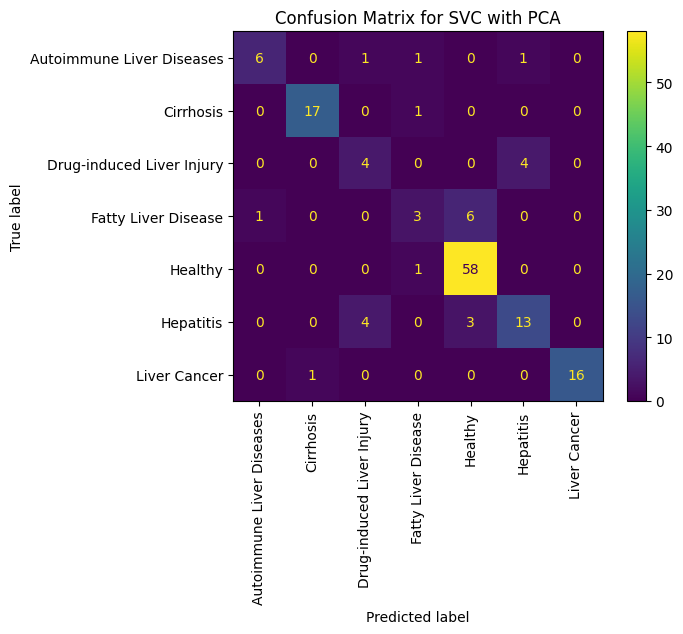

In [591]:
# Predicting the test data best model
# ===================================
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.2, random_state=42)
best_model = grid_search_svc_pca.best_estimator_
best_model.fit(X_train_c, y_train_c)
y_pred = best_model.predict(X_test_c)

# Generating the confusion matrix (Taken from the lecture)
# ========================================================
ConfusionMatrixDisplay.from_predictions(y_test_c, y_pred)
plt.title('Confusion Matrix for SVC with PCA')
plt.xticks(rotation=90)
plt.show()

### Final evaluation

In [532]:
# Dropping the first column from df_test
# =======================================
df_test = df_test.drop('index', axis=1)

# Converting the catagorical data to numerical data
# =================================================
df_test_dummies = pd.get_dummies(df_test, drop_first=True)


In [534]:
X_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 0 to 702
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AFP (ng/mL)                 668 non-null    float64
 1   ALP (U/L)                   668 non-null    float64
 2   ALT (U/L)                   668 non-null    float64
 3   AST (U/L)                   668 non-null    float64
 4   Age                         668 non-null    int64  
 5   Albumin (g/dL)              668 non-null    float64
 6   Bilirubin (mg/dL)           668 non-null    float64
 7   CRP (mg/L)                  668 non-null    float64
 8   Fibroscan (kPa)             668 non-null    float64
 9   GGT (U/L)                   668 non-null    float64
 10  Hemoglobin (g/dL)           668 non-null    float64
 11  IL-6 (pg/mL)                668 non-null    float64
 12  PT/INR                      668 non-null    float64
 13  Platelets (10^9/L)          668 non-null

In [533]:
df_test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 301
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AFP (ng/mL)                 302 non-null    float64
 1   ALP (U/L)                   302 non-null    float64
 2   ALT (U/L)                   302 non-null    float64
 3   AST (U/L)                   302 non-null    float64
 4   Age                         302 non-null    int64  
 5   Albumin (g/dL)              302 non-null    float64
 6   Bilirubin (mg/dL)           302 non-null    float64
 7   CRP (mg/L)                  302 non-null    float64
 8   Fibroscan (kPa)             302 non-null    float64
 9   GGT (U/L)                   302 non-null    float64
 10  Hemoglobin (g/dL)           302 non-null    float64
 11  IL-6 (pg/mL)                302 non-null    float64
 12  PT/INR                      302 non-null    float64
 13  Platelets (10^9/L)          302 non-null

In [537]:
# Fitting the best model on the training data
# ===========================================
best_model.fit(X_cleaned, y_cleaned)

# Predicting the test data
# ========================
y_pred_final = best_model.predict(df_test_dummies)

### Kaggle submission

In [544]:
# Mapping the diagnosis back to the original values
# =================================================
diagonosis_dict_reverse = {v: k for k, v in diagonosis_dict.items()}
y_pred_final = pd.Series(y_pred_final).map(diagonosis_dict_reverse)

In [546]:
#----------------------------------------
# Creating csv file for Kaggle submission
#----------------------------------------
DF = pd.DataFrame(y_pred_final)
headers = ["Diagnosis"]
DF.columns = headers
DF.to_csv('predictions.csv', index_label='index', index=True)

#### ROC Curve for Binary Version of the Target variable

In [563]:
# Coverting the diagoniss column to 2 classes
# ============================================
df_train_simplified = df_cleaned.copy()
df_train_simplified['Diagnosis'] = df_train_simplified['Diagnosis'].apply(lambda x: 0 if x == 0 else 1)


In [ ]:
X_simplified = df_train_simplified.drop('Diagnosis', axis=1)
y_simplified = df_train_simplified['Diagnosis']

/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

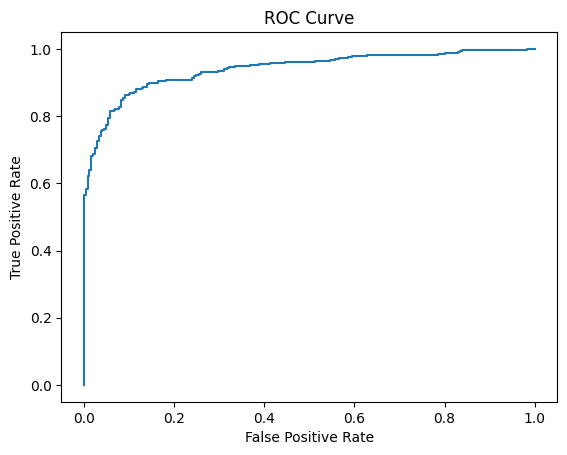

In [581]:
# Defining the classifier
# ========================
lr = LogisticRegression()
# Producing the probabilities for each class
y_prob = cross_val_predict(lr, X_simplified, y_simplified, cv=5, method='predict_proba')
fpr, tpr, thresholds = roc_curve(y_simplified, y_prob[:, 1])

# Plotting the ROC curve
# ======================
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
